In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.utils import shuffle
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
positive = pd.read_csv('D:/DATA (D)/Projects/NLP_project/positive.csv', encoding = 'Windows-1252')
negative = pd.read_csv('D:/DATA (D)/Projects/NLP_project/negative.csv', encoding = 'Windows-1252')

In [3]:
positive.head()

,text
0,the rock is destined to be the 21st century's ...
1,"the gorgeously elaborate continuation of "" the..."
2,effective but too-tepid biopic
3,if you sometimes like to go to the movies to h...
4,"emerges as something rare , an issue movie tha..."


In [4]:
positive.shape

(5331, 1)

In [5]:
positive['sentiment'] = np.ones(positive.shape[0], dtype = np.int8)

In [6]:
positive.head()

,text,sentiment
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [7]:
negative['sentiment'] = np.zeros(negative.shape[0], dtype = np.int8)

In [8]:
negative.head()

,text,sentiment
0,"simplistic , silly and tedious .",0
1,"it's so laddish and juvenile , only teenage bo...",0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0


In [9]:
train = shuffle(pd.concat([positive.iloc[:4000, :], negative.iloc[:4000, :]], axis = 0), random_state=71).reset_index(drop = True)

In [10]:
train.tail()

,text,sentiment
7995,this version moves beyond the original's nosta...,1
7996,there's a bit of thematic meat on the bones of...,0
7997,a quiet family drama with a little bit of roma...,1
7998,on a cutting room floor somewhere lies . . . f...,0
7999,roman polanski directs the pianist like a surg...,0


In [11]:
validation = shuffle(pd.concat([positive.iloc[4000:4500, :], negative.iloc[4000:4500, :]], axis = 0), random_state=71).reset_index(drop = True)

In [12]:
test = shuffle(pd.concat([positive.iloc[4500:, :], negative.iloc[4500:, :]], axis = 0), random_state=71).reset_index(drop = True)

In [13]:
train['text'][100]

'a twisty , moody slice of southern gothic . . .'

### Cleaning

In [14]:
def cleaning(text):
    puncts = string.punctuation
    text = re.sub(r'\W', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [15]:
train['text'] = train['text'].apply(cleaning)

In [16]:
train.text[1011]

'it establishes its ominous mood and tension swiftly and if the suspense never rises to a higher level it is nevertheless maintained throughout '

### Tokenization and stop-words removal

In [17]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def tokenization(text):
    tokens = word_tokenize(text)
    s = [word for word in tokens if word not in stop_words]
    s = [ps.stem(word) for word in s]
    return ' '.join(s)

In [18]:
train['text'] = train['text'].apply(tokenization)

In [19]:
def preprocessing(text):
    puncts = string.punctuation
    text = re.sub(r'\W', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    s = [word for word in tokens if word not in stop_words]
    s = [ps.stem(word) for word in s]
    return ' '.join(s)

### CountVectorizer

#### Hyperparameters

~encoding = "Windows-1252"

ngrams

max_df

min_df

max_features

binary

--> Can remove the words from the vocabulary which has frequency more than
    some threshold

### Bag-of-words

In [42]:
countv = CountVectorizer(encoding='Windows-1252', max_features=5000, binary = True)
countv.fit_transform(train['text'])

<8000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 76482 stored elements in Compressed Sparse Row format>

In [43]:
dic = countv.vocabulary_
vocab = [key for key, _ in dic.items()]
freq = [val for _, val in dic.items()]

len(vocab)

5000

In [49]:
countv.vocabulary_

{'film': 1627,
 'lose': 2558,
 'sight': 3983,
 'stori': 4231,
 'feel': 1602,
 'like': 2502,
 'school': 3833,
 'special': 4130,
 'fanci': 1572,
 'effect': 1365,
 'watch': 4832,
 'rote': 3736,
 'plot': 3270,
 'point': 3287,
 'connect': 943,
 'excit': 1509,
 'gaze': 1785,
 'egg': 1369,
 'timer': 4490,
 '93': 53,
 'minut': 2749,
 'suggest': 4312,
 'actual': 98,
 'see': 3866,
 'unless': 4681,
 'kind': 2354,
 'person': 3205,
 'seen': 3871,
 'everi': 1489,
 '70': 46,
 'one': 3016,
 'unassum': 4624,
 'sneak': 4072,
 'stay': 4196,
 'long': 2551,
 'left': 2449,
 'theatr': 4446,
 'thing': 4455,
 'give': 1814,
 'movi': 2831,
 'take': 4374,
 'entir': 1446,
 'stale': 4178,
 'concept': 924,
 'push': 3453,
 'audienc': 346,
 'meat': 2678,
 'time': 4488,
 'beauti': 420,
 'labor': 2389,
 'hint': 2012,
 'write': 4953,
 'exercis': 1513,
 'part': 3137,
 'target': 4386,
 'cheer': 750,
 'otherwis': 3057,
 'mayb': 2666,
 'annoy': 246,
 'orgi': 3048,
 'excess': 1507,
 'exploit': 1528,
 'goe': 1839,
 'nowher': 2

In [44]:
bow_feature_data = countv.fit_transform(train['text']).toarray()
bow_test_data = countv.transform(test['text']).toarray()

In [45]:
np.sum(bow_feature_data[0] == 0)

4996

### Tfidf

### Hyperparameters

ngram_range

max_df

min_df

max_features

binary
    If True, all non-zero term counts are set to 1. This does not mean
    outputs will have only 0/1 values, only that the tf term in tf-idf
    is binary. (Set idf and normalization to False to get 0/1 outputs).

norm (can be)

use_idf : True/False (default = True)
    
smooth_idf : True/False (default = True)
    
sublinear_tf = True/False (default = False)

In [46]:
tf = TfidfVectorizer(encoding = 'Windows-1252', max_features=5000)
tf.fit_transform(train['text'])
tf.transform(test['text'])

<1662x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 8332 stored elements in Compressed Sparse Row format>

In [47]:
tf.vocabulary

In [48]:
tf.vocabulary_


{'film': 1666,
 'lose': 2568,
 'sight': 3962,
 'stori': 4212,
 'feel': 1641,
 'like': 2511,
 'school': 3811,
 'special': 4110,
 'fanci': 1611,
 'effect': 1385,
 'watch': 4837,
 'rote': 3700,
 'plot': 3286,
 'point': 3300,
 'connect': 929,
 'excit': 1542,
 'gaze': 1825,
 'egg': 1389,
 'timer': 4487,
 '93': 45,
 'minut': 2782,
 'suggest': 4293,
 'actual': 87,
 'see': 3844,
 'unless': 4685,
 'kind': 2397,
 'person': 3228,
 'seen': 3849,
 'everi': 1522,
 '70': 38,
 'one': 3077,
 'unassum': 4628,
 'sneak': 4052,
 'stay': 4177,
 'long': 2561,
 'left': 2473,
 'theatr': 4433,
 'thing': 4442,
 'give': 1854,
 'movi': 2868,
 'take': 4355,
 'entir': 1466,
 'stale': 4159,
 'concept': 910,
 'push': 3451,
 'audienc': 335,
 'meat': 2711,
 'time': 4484,
 'beauti': 413,
 'labor': 2422,
 'hint': 2053,
 'write': 4958,
 'exercis': 1548,
 'part': 3170,
 'target': 4368,
 'cheer': 727,
 'otherwis': 3105,
 'mayb': 2698,
 'annoy': 231,
 'excess': 1540,
 'exploit': 1566,
 'goe': 1879,
 'nowher': 3032,
 'bad': 36

In [50]:
tfidf_feature_data = tf.fit_transform(train['text']).toarray()
tfidf_test_data = tf.transform(test['text']).toarray()

In [51]:
np.sum(tfidf_feature_data[0] == 0)

4996

### Training and test data formation

In [52]:
x_train_bow = bow_feature_data
x_test_bow = bow_test_data
x_train_tf = tfidf_feature_data
x_test_tf = tfidf_test_data

y_train = train.iloc[:, -1]

In [69]:
y_test = test.iloc[:, -1]

In [53]:
x_test_bow.shape

(1662, 5000)

### Validation data formation

In [54]:
validation['text'] = validation['text'].apply(preprocessing)
x_val_bow = countv.transform(validation['text']).toarray()
x_val_tf = tf.transform(validation['text']).toarray()
y_val = validation.iloc[:, -1]

K-fold Stratified

In [62]:
cv = StratifiedKFold(n_splits=4)
lr = LogisticRegressionCV(max_iter = 100, cv = cv, solver = 'lbfgs', n_jobs = 6, verbose = 2)

In [63]:
# for bag-of-words
lr.fit(x_train_bow, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   4 | elapsed:  1.5min remaining:  1.5min
[Parallel(n_jobs=6)]: Done   4 out of   4 | elapsed:  1.5min finished


LogisticRegressionCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                     n_jobs=6, verbose=2)

In [64]:
np.mean(lr.scores_[1], axis  = 1)

array([0.70715, 0.7058 , 0.69135, 0.71265])

#### TFIDF

In [66]:
lr.fit(x_train_tf, y_train)
lr.scores_

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   4 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=6)]: Done   4 out of   4 | elapsed:  1.2min finished


{1: array([[0.722 , 0.718 , 0.72  , 0.7255, 0.7415, 0.7505, 0.736 , 0.711 ,
         0.696 , 0.6905],
        [0.723 , 0.724 , 0.7255, 0.726 , 0.7515, 0.7565, 0.7395, 0.7115,
         0.6985, 0.695 ],
        [0.7135, 0.7135, 0.7155, 0.7205, 0.7405, 0.735 , 0.7145, 0.6955,
         0.679 , 0.671 ],
        [0.7155, 0.7205, 0.722 , 0.7295, 0.7415, 0.751 , 0.7325, 0.7225,
         0.7115, 0.7065]])}

In [67]:
np.mean(lr.scores_[1], axis = 1)

array([0.7211 , 0.7251 , 0.70985, 0.7253 ])

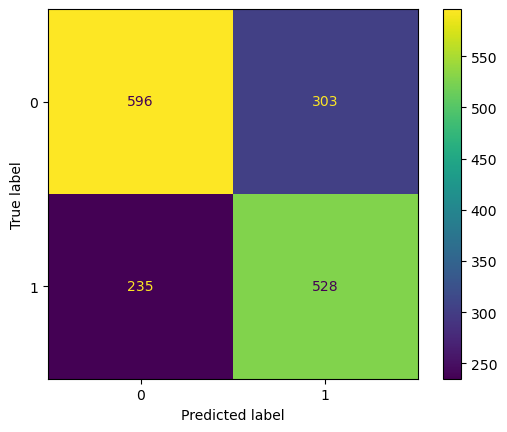

In [77]:
tf_predictions = lr.predict(x_test_tf)
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(tf_predictions, y_test))
cmd.plot()
plt.show()

In [79]:
print(classification_report(tf_predictions, y_test))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       899
           1       0.64      0.69      0.66       763

    accuracy                           0.68      1662
   macro avg       0.68      0.68      0.68      1662
weighted avg       0.68      0.68      0.68      1662



### Simple LogisticRegression

In [80]:
simple_lr = LogisticRegression(max_iter = 200, n_jobs = 8, verbose = 2)

In [81]:
simple_lr.fit(x_train_tf, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    3.1s finished


LogisticRegression(max_iter=200, n_jobs=8, verbose=2)

In [82]:
pred = simple_lr.predict(x_test_tf)

In [83]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       888
           1       0.64      0.68      0.66       774

    accuracy                           0.67      1662
   macro avg       0.67      0.67      0.67      1662
weighted avg       0.67      0.67      0.67      1662



## SVM

In [84]:
from sklearn.svm import SVC

In [87]:
clf = SVC(kernel = 'poly')
clf.fit(x_train_bow, y_train)

SVC(kernel='poly')

In [88]:
svc_pred = clf.predict(x_test_bow)
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68      1234
           1       0.36      0.70      0.47       428

    accuracy                           0.60      1662
   macro avg       0.60      0.63      0.58      1662
weighted avg       0.72      0.60      0.63      1662



In [ ]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return [self.preprocessing(text) for text in X]
    def preprocessing(self, text):
        puncts = string.punctuation
        text = re.sub(r'\W', ' ', text) 
        text = re.sub(r'\s+', ' ', text)
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        s = [word for word in tokens if word not in stop_words]
        s = [ps.stem(word) for word in s]
        return ' '.join(s)